<a href="https://colab.research.google.com/github/tonalidae/APIEquipo7/blob/main/ReviewPython-QuiskitExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A fast review of python
Python is a scripted language. Python programs are stored in text files with `.py` extensions, but currently the Jupyter notebooks are much more popular since they allow mixing both code and explanatory text  (like this file). Notebooks are json files with a `.ipynb` extension. Python ecosystem is really large and it has permeated many fields, hence its popularity.

<div style="text-align: center;">
<figure>
<img src="https://github.com/iluvatar1/PythonReviewForQiskit/blob/master/figs/lang-top.png?raw=1" width=60%>
<figcaption> lang top </figcaption>
</figure>
</div>

[Programming languages popularity: 2025 Stack Overflow report](https://survey.stackoverflow.co/2025/technology#most-popular-technologies-language)

In the realm of quantum computing, Python has become the de facto standard. Its clean syntax, extensive scientific libraries like NumPy and Matplotlib, and the presence of powerful quantum frameworks such as Qiskit, make it the ideal language for both learning and research.



# Setup

NOTE: Please note that if you want to run ANY bash command from this notebook directly, instead of using a terminal, you have to prepend `!`. Example: instead of running just `ls`, use `!ls`.  

For example, for now, we will install needed packages using either
```bash
!pip install qiskit
```

or, much better (if `uv` is installed)
```bash
uv pip install qiskit
```

Installing `uv`:

In [1]:
# Install uv
!curl -LsSf https://astral.sh/uv/install.sh | sh

downloading uv 0.9.10 x86_64-unknown-linux-gnu
no checksums to verify
installing to /usr/local/bin
  uv
  uvx
everything's installed!


## Python packages installing
It's a good practice to manage project dependencies in a file. Let's create a `requirements.txt` containing the essential packages for this introductory material:

In [2]:
%%writefile requirements.txt
jupyterlab
numpy
matplotlib
seaborn
#scikit-learn
#pytorch
qiskit
qiskit-aer
bokeh
plotly
ipywidgets
pylatexenc

Writing requirements.txt


And now let's install the packages:

In [3]:
# Install packages in requirements.txt
!uv pip install -r requirements.txt

Using Python 3.12.12 environment at: /usr
Resolved 119 packages in 1.33s
Prepared 11 packages in 1.55s
Installed 11 packages in 207ms
 + async-lru==2.0.5
 + jedi==0.19.2
 + json5==0.12.1
 + jupyter-lsp==2.3.0
 + jupyterlab==4.5.0
 + jupyterlab-server==2.28.0
 + pylatexenc==2.10
 + qiskit==2.2.3
 + qiskit-aer==0.17.2
 + rustworkx==0.17.1
 + stevedore==5.5.0


# Variables, data structures, loops, logical conditions
In python all variables hs type, but they are not explicit. This is somehow convenient, specially when you are starting to program, but for more advanced topics and for correct programming it is good to keep track of vars types and conversions, hence the current type hints usage.

In [4]:
name = "Alice"
age = 30
is_scientist = True
pi = 3.14

There are some basic data structures like list, tuples, and dictionaries, that will be useful later.

In [ ]:
# Lists, tuples, dictionaries
lst = [1, 2, 3] # mutable
tpl = (1, 2, 3) # non-mutable
primes = {2, 3, 5, 7, 7} # set, mutable
dct = {"00": 5, "11": 7} # mutable, key-value
lst, tpl, primes, dct

([1, 2, 3], (1, 2, 3), {2, 3, 5, 7}, {'00': 5, '11': 7})

A  comparison

| Feature | **List** | **Set** | **Dictionary** |
|--------|----------|--------|----------------|
| **Purpose** | Ordered collection of items (e.g., time series, gene order) | Unordered collection of **unique** items (e.g., unique genes, species) | Key-value pairs (e.g., gene → expression level) |
| **Syntax** | `[]` | `{}` | `{key: value}` |
| **Order** | ✅ Ordered (index matters) | ❌ Unordered | ✅ Ordered (in Python 3.7+) |
| **Duplicates Allowed?** | ✅ Yes | ❌ No (automatically removes duplicates) | ✅ Keys must be unique; values can repeat |
| **Access by Index?** | ✅ Yes (`my_list[0]`) | ❌ No (no indexing) | ❌ No (use keys) |
| **Access by Key?** | ❌ No | ❌ No | ✅ Yes (`my_dict['key']`) |
| **Mutability** | ✅ Mutable (can change) | ✅ Mutable | ✅ Mutable |
| **Use Case in Science** | Time series, ordered data (e.g., measurements over time) | Unique elements (e.g., all unique proteins in a sample) | Gene → expression level, sample → metadata |
| **Example** | `genes = ["TP53", "BRCA1", "MYC"]` | `unique_genes = {"TP53", "BRCA1", "MYC"}` | `expression = {"TP53": 2.1, "BRCA1": 0.8}` |
| **Fast Lookup?** | ❌ Slow (linear search) | ✅ Very fast (hash-based) | ✅ Very fast (by key) |
| **Can contain different types?** | ✅ Yes (e.g., numbers, strings, even other lists) | ✅ Yes (but only immutable types like strings, numbers) | ✅ Yes (keys must be immutable) |

**WARNING**
Never use a `list` for data to be transversed fast, use `numpy` arrays or similar. Never use a `numpy` array when you need to insert data in the middle, frequently.


## Data Structures in Qiskit

You will use these data structures constantly in Qiskit:

- Lists are often used to specify which qubits or classical bits to apply operations to. For example, `qc.cx(0, 1)` applies a CNOT gate to a control qubit at index 0 and a target qubit at index 1.

- Dictionaries are the standard way that quantum measurement results (or "counts") are returned from a simulator or real hardware. The keys are the measured bitstrings, and the values are the number of times that outcome was observed.

### Exercise
After running a quantum experiment that measures two qubits 100 times, you observe the state '01' 52 times and the state '10' 48 times. Represent these results in a Python dictionary named `experiment_counts`.

## Printing with f-strings

f-strings provide a concise and convenient way to embed expressions inside string literals for formatting.
- <https://fstring.help/cheat/>
- <https://www.pythonmorsels.com/format/>
- <https://fstrings.wtf/>

In [ ]:
name = "Einstein"
year = 1905
print(f"{name}'s miracle year was {year=}.")

pi = 3.14159
print(f"Pi rounded to two decimal places: {pi:.2f}")


Einstein's miracle year was year=1905.
Pi rounded to two decimal places: 3.14


# Loops and list comprehensions
Loops allow to apply the same instruction to multiple data, and/or traverse structures

In [ ]:
# Loop example: apply H to each qubit (conceptual)
a = []
for i in range(10):
    a.append(i*i)
print(a)

# List comprehension
squares = [i*i for i in range(10)]
print(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [ ]:
%%timeit
a = []
for ii in range(1000000):
    a.append(ii*ii)


27.2 ms ± 4.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit
a = [ii*ii for ii in range(1000000)]

23.9 ms ± 704 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Exercise
Create a list of cubes from 0 to 9, skipping the number 3.

You can also use comprehensions for sets, dictionaries, ...
```python
expensive_items = {k: v for k, v in prices.items() if v > 10}
```

In [ ]:
# Dictionary comprehension
original = {'a': 1, 'b': 2, 'c': 3}
# Output: {1: 'a', 2: 'b', 3: 'c'}
swapped = {value: key for key, value in original.items()}
swapped

{1: 'a', 2: 'b', 3: 'c'}

-----

### Summary of Syntax Differences

It all comes down to the brackets and the colon.

| Type | Brackets | Syntax | Result |
| :--- | :--- | :--- | :--- |
| **List** | `[ ]` | `[x for x in data]` | `[1, 2, 3]` (Ordered, allows dupes) |
| **Set** | `{ }` | `{x for x in data}` | `{1, 2, 3}` (Unordered, unique) |
| **Dict** | `{ }` | `{k:v for k,v in data}` | `{'a': 1}` (Key-Value pairs) |
| **Generator**| `( )` | `(x for x in data)` | `<generator object>` (Lazy evaluation) |


### Mini-Exercise
Create a dictionary comprehension that maps each integer from 0 to 10 to its square,
but include only the even numbers.

**Expected structure:** `{0:0, 2:4, 4:16, ...}`

### `enumerate()`
Iterate over index and item at the same time:


In [ ]:
for i, angle in enumerate([0, 0.5, 1.0]):
    print(i, angle)


0 0
1 0.5
2 1.0


### `zip`


In [ ]:
for theta, phi in zip([0, 1], [0.1, 0.2]):
    print(theta, phi)

0 0.1
1 0.2


## Exceptions
Sometimes, specially for critical programs that must not just end after and error, it is useful to use exceptions


In [ ]:
try:
    x = 1/0
except Exception as e:
    print("Error:", e)
finally:
    print("Finished")
print("After problematic block")

Error: division by zero
Finished
After problematic block


In [ ]:
# Transpilation is the process of rewriting a circuit for a specific hardware's native gate set.
# Here, we intentionally use a non-standard gate name ("cx1") to trigger an error.

from qiskit import QuantumCircuit, transpile

qc = QuantumCircuit(2)
qc.h(0); qc.cx(0, 1)

#tqc = transpile(qc, basis_gates=["u3", "cx"])
#tqc = transpile(qc, basis_gates=["u3", "cx1"]) # Error

try:
    #tqc = transpile(qc, basis_gates=["u3", "cx"])
    tqc = transpile(qc, basis_gates=["u3", "cx1"]) # Error
except Exception as e:
    print(f"Exception catched: {e}")
finally:
    print("Transpilation attempt finished.")

print("--> After try block")


Exception catched: Providing non-standard gates (cx1) through the ``basis_gates`` argument is not allowed. Use the ``target`` parameter instead. You can build a target instance using ``Target.from_configuration()`` and provide custom gate definitions with the ``custom_name_mapping`` argument.
Transpilation attempt finished.
--> After try block


## Loops in Qiskit
Loops are perfect for applying the same gate or sequence of gates to many qubits.

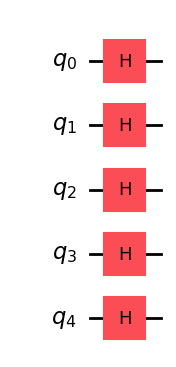

In [ ]:
from qiskit import QuantumCircuit

# Use a loop to apply a Hadamard gate to every qubit
num_qubits = 5
qc = QuantumCircuit(num_qubits)

for i in range(num_qubits):
    qc.h(i)

# Let's see the circuit we created
qc.draw('mpl')

## Exercise
Create a QuantumCircuit with 4 qubits. Using a for loop, apply a Pauli-X gate (the quantum NOT gate) to each qubit. Draw the resulting circuit.

# Functions and lambdas
Functions are useful to reuse the same code with different data. Remember he DRY principle: Don't Repeat Yourself. Using type-hints help you catch errors early, even when checking complex programs with tools like ruff, etc.

In [ ]:
def myfunction(a: int) -> list[int]:
    """
    This is a docstring, always use it
    a : range limit
    returns: list of ...
    """
    return [i*i for i in range(a)]

print(myfunction(2))
print(myfunction(4))



[0, 1]
[0, 1, 4, 9]
Help on function myfunction in module __main__:

myfunction(a: int) -> list[int]
    This is a docstring, always use it
    a : range limit
    returns: list of ...



In [ ]:
help(myfunction)

Help on function myfunction in module __main__:

myfunction(a: int) -> list[int]
    This is a docstring, always use it
    a : range limit
    returns: list of ...



In [ ]:
from qiskit import QuantumCircuit

def build_bell(a: int, b: int) -> QuantumCircuit:
    qc = QuantumCircuit(2)
    qc.h(a)
    qc.cx(a, b)
    return qc

bell = build_bell(0, 1)
bell

In [ ]:
bell2 = build_bell(1, 0)
bell2

## Creating Reusable Quantum Circuits

Functions are the primary way we build complex quantum circuits from smaller, reusable components. The build_bell function is a perfect example of a 2-qubit "circuit block". We can create more complex ones, like a function to generate a GHZ (Greenberger–Horne–Zeilinger) state, which is a maximally entangled state for N qubits.

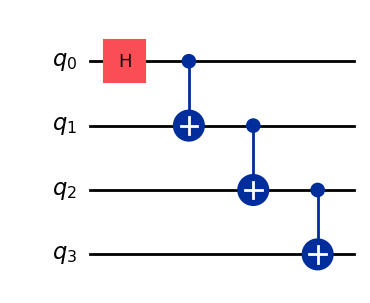

In [ ]:
def build_ghz(num_qubits: int) -> QuantumCircuit:
    """
    Creates a GHZ state circuit for a given number of qubits.
    """
    qc = QuantumCircuit(num_qubits)
    # First, apply a Hadamard gate to the first qubit
    qc.h(0)
    # Then, cascade CNOT gates
    for i in range(num_qubits - 1):
        qc.cx(i, i + 1)
    return qc

# Build and draw a 4-qubit GHZ state
ghz_circuit = build_ghz(4)
ghz_circuit.draw('mpl')

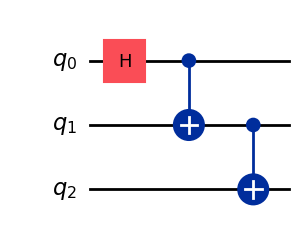

In [ ]:
# Build and draw a 3-qubit GHZ state
ghz_circuit = build_ghz(3)
ghz_circuit.draw('mpl')

## Lambda functions


In [ ]:
pairs = {'a': 3, 'b': 1, 'c': 5}
sorted_pairs = sorted(pairs.items(), key=lambda kv: kv[1])
sorted_pairs

[('b', 1), ('a', 3), ('c', 5)]

### Lambda Functions in Qiskit

A very common use case for lambda functions in quantum computing is to sort the counts dictionary you get from a measurement. You might want to sort by the bitstring (the key) or by the number of times it was measured (the value).

In [ ]:
counts = {'00': 509, '11': 515}
# Let's get some "measurement" counts from some Bell state experiment
print(f"Original counts: {counts}")

# Sort by bitstring (key)
sorted_by_key = sorted(counts.items(), key=lambda item: item[0])
print(f"Sorted by key:   {sorted_by_key}")

# Sort by number of shots (value), in descending order
sorted_by_value = sorted(counts.items(), key=lambda item: item[1], reverse=True)
print(f"Sorted by value: {sorted_by_value}")

Original counts: {'00': 509, '11': 515}
Sorted by key:   [('00', 509), ('11', 515)]
Sorted by value: [('11', 515), ('00', 509)]


## **kwargs and *args

What are `*args` and `**kwargs`?  In Python, `*args` and `**kwargs` are special syntax that let you pass a **variable number of arguments** to a function.

- `*args`:  For **positional arguments** (non-keyword)
    - `args` is a tuple of all extra **positional** arguments.
    - Use `*` before the parameter name.

- `**kwargs`: For **keyword arguments** (named arguments)
    - `kwargs` is a dictionary of all extra **named** arguments.
    - Use `**` before the parameter name.

This is a simple example:

In [ ]:
def my_function(*args, **kwargs):
    print("Positional args (args):", args)
    print("Keyword args (kwargs):", kwargs)

# Call it with different numbers of arguments
print("First call:")
my_function(1, 2, 3, name="Alice", age=25, city="Boston")
print("\nSecond call:")
my_function(4, age=52, city="Tabogo")

First call:
Positional args (args): (1, 2, 3)
Keyword args (kwargs): {'name': 'Alice', 'age': 25, 'city': 'Boston'}

Second call:
Positional args (args): (4,)
Keyword args (kwargs): {'age': 52, 'city': 'Tabogo'}


# Objects and OOP
In python everything is an object. For complex problems, is usually easier to understand better if th emodelling is done through Object Oriented Programming. In qiskit, in particular, quantum circuits are represented as objects. Therefore, it is good to get a basic understanding on how to use OOP. Objects are also useful to "keep state".

In [ ]:
class Counter:
    def __init__(self):
        self.value = 0
    def inc(self):
        self.value += 1
    def __repr__(self):
        return f'Counter(value={self.value})'

c = Counter()
c.inc()
c


Counter(value=1)

In [ ]:
c.inc()
c

Counter(value=2)

In [ ]:
class Scientist:
    def __init__(self, name: str, field: str):
        self.name = name
        self.field = field
        self.another_field_ = 3.14
        print(f"Scientist {self.name} in {self.field} has been created.")

    def introduce(self):
        return f"I am {self.name}, and I work in {self.field}."

    def __del__(self):
        print(f"Scientist {self.name} in {self.field} is being destroyed.")


# Create an instance
marie = Scientist("Marie Curie", "Physics and Chemistry")
print(marie.introduce())

# Delete the object explicitly
del marie


Scientist Marie Curie in Physics and Chemistry has been created.
I am Marie Curie, and I work in Physics and Chemistry.
Scientist Marie Curie in Physics and Chemistry is being destroyed.


## Object-Oriented Programming in Qiskit

This is a critical concept: nearly everything in Qiskit is an object.

When you write
```python
qc = QuantumCircuit(2)
```
you are creating an instance of the ```QuantumCircuit``` class.

When you write `qc.h(0)` or `qc.draw()`, you are calling methods on that `qc` object. The object holds the "state" of your circuit—its qubits, gates, and their order. This is OOP in action!

- `qc` is an object.

- `.h(0)` is a method that modifies the qc object's internal state.

- `.num_qubits` is a property (or attribute) that stores data about the object.

## Data class for storing circuit info


In [ ]:
from dataclasses import dataclass

@dataclass
class CircuitSpec:
    n_qubits: int
    description: str

spec = CircuitSpec(3, "GHZ preparation")
print(spec)


CircuitSpec(n_qubits=3, description='GHZ preparation')


**Parametrized circuit**

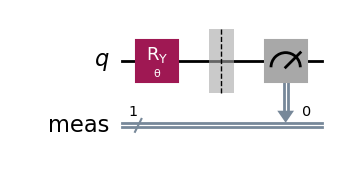

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

theta = Parameter("θ")

qc = QuantumCircuit(1)
qc.ry(theta, 0)
qc.measure_all()
qc.draw("mpl")


## Exercise
1. Create a `QuantumCircuit` object for 3 qubits.
2. Use the `dir()` function to see all the available methods and attributes for your circuit object.
3. Find and use the object's property to print the number of qubits it has (Hint: look for an attribute like num_qubits).

# Plotting in science and quantum computing

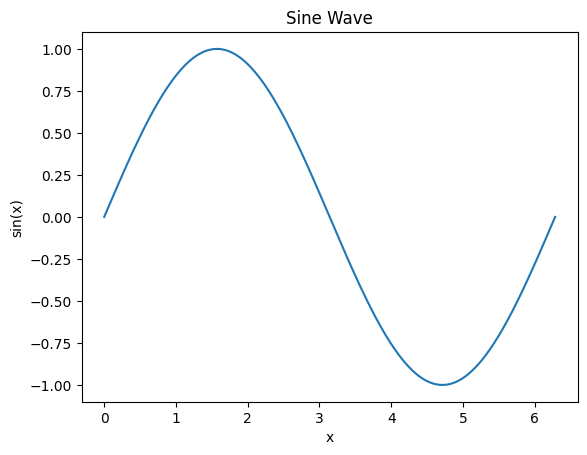

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)

plt.plot(x, y)
plt.title("Sine Wave")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()

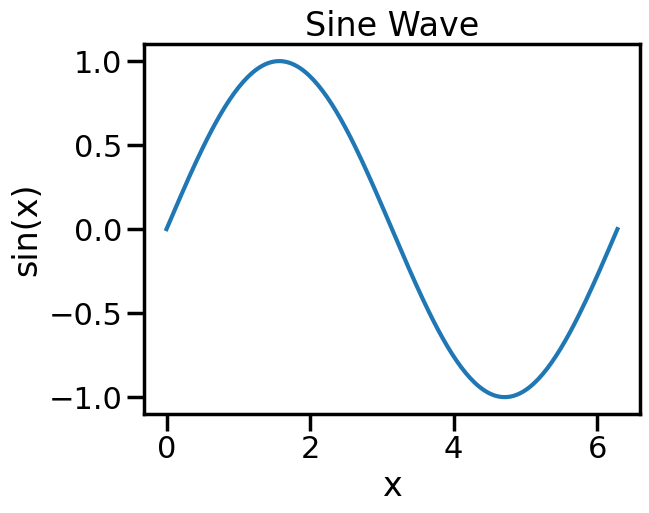

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_context('poster')

x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)

plt.plot(x, y)
plt.title("Sine Wave")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()

In [ ]:
# https://plotly.com/python/plotly-express/
import plotly.express as px
import numpy as np
X = np.linspace(0.0, 10.9, 1009)
y = np.sin(X)
# Plotly
fig = px.scatter(x=X.flatten(), y=y, title="Plotly Scatter Plot")
fig.show()

In [ ]:
# https://bokeh.org/
from bokeh.plotting import figure, show
# Bokeh
p = figure(title="Bokeh Scatter Plot")
p.scatter(X.flatten(), y, size=10)
show(p)

## Plotting in Qiskit

While matplotlib and seaborn are fantastic for general-purpose plotting, Qiskit comes with its own powerful and specialized visualization tools. The three most common are:
- `qc.draw()`: To visualize the quantum circuit itself.
- `plot_histogram()`: To plot the results (counts) of a quantum experiment.
- `plot_bloch_vector()`: To visualize the state of a single qubit on the Bloch sphere.

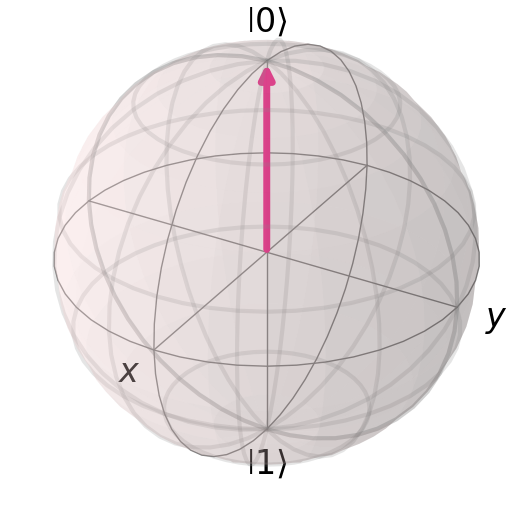

In [ ]:
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt

plot_bloch_vector([0,0,1])

## Some startup examples


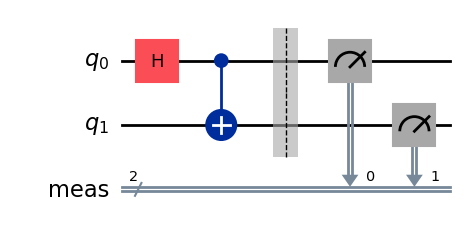

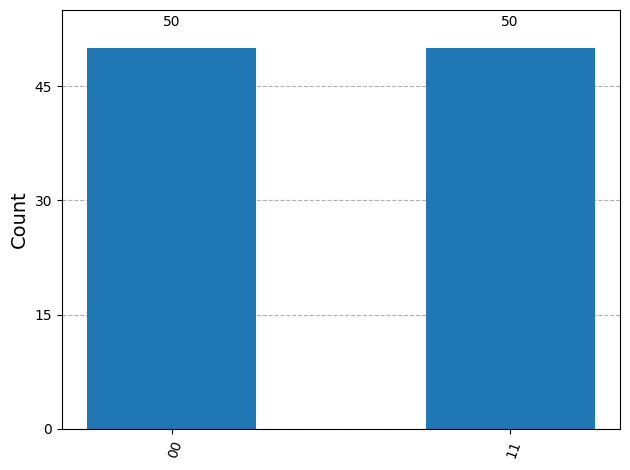

In [ ]:
# Random samples
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
display(qc.draw("mpl"))

from qiskit_aer import AerSimulator

sim = AerSimulator()
result = sim.run(qc, shots=100).result()
counts = result.get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts)


Bell State Circuit:


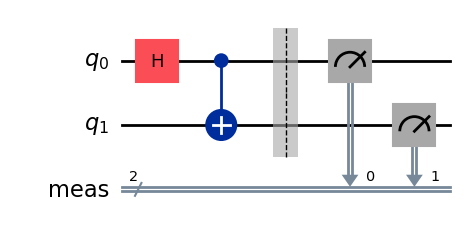

\nSimulation Results (Counts Dictionary):
{'00': 509, '11': 515}
\nResult Histogram:


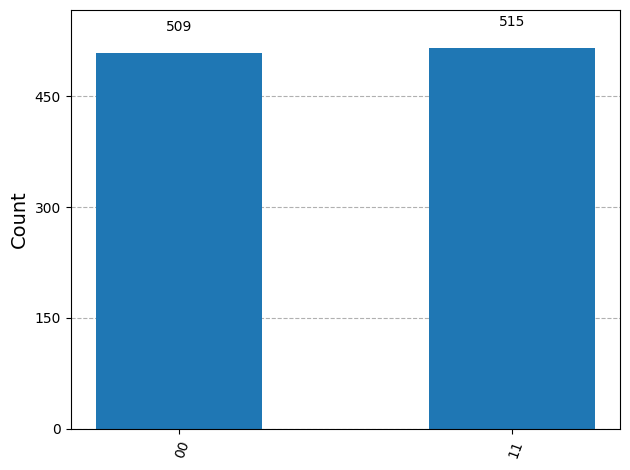

In [ ]:
# Bell circuit
def build_bell(a: int, b: int) -> QuantumCircuit:
    qc = QuantumCircuit(2)
    qc.h(a)
    qc.cx(a, b)
    return qc

# Build, Simulate, and Plot a Bell State

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator # The simulator
from qiskit.visualization import plot_histogram

# 1. BUILD: Create the circuit using our function from before
bell_qc = build_bell(0, 1)

# We need to measure the qubits to get a result
bell_qc.measure_all()
print("Bell State Circuit:")
display(bell_qc.draw('mpl'))


# 2. SIMULATE: Run the circuit on a simulator
# This is an object that simulates a perfect quantum computer
simulator = AerSimulator()
# We run the experiment 1024 times (shots)
result = simulator.run(bell_qc, shots=1024).result()
counts = result.get_counts(bell_qc)

print("\\nSimulation Results (Counts Dictionary):")
print(counts)


# 3. VISUALIZE: Plot the results with a histogram
print("\\nResult Histogram:")
plot_histogram(counts)

Parameterized Circuit:
     ┌───┐┌───────┐┌───┐┌─┐
  q: ┤ H ├┤ Rz(θ) ├┤ H ├┤M├
     └───┘└───────┘└───┘└╥┘
c: 1/════════════════════╩═
                         0 


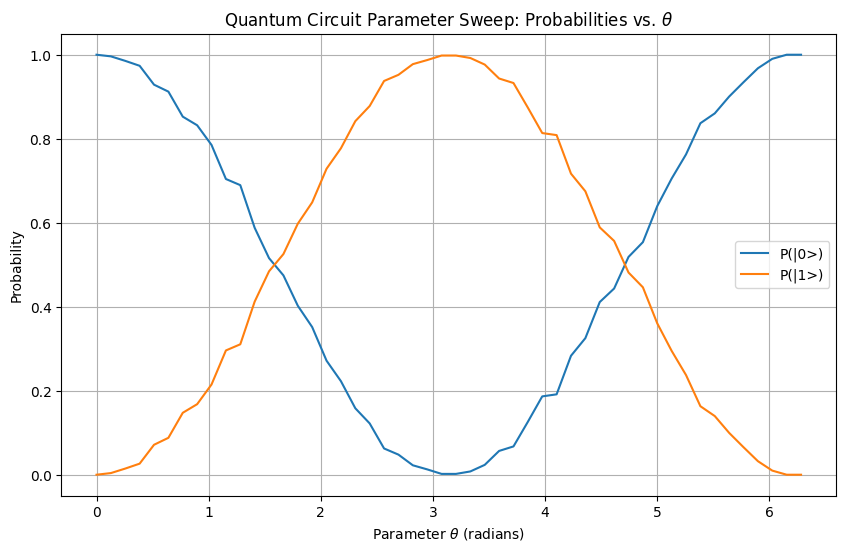

In [ ]:
# Parameter sweep
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter
import matplotlib.pyplot as plt

# 1. Define a parameterized quantum circuit
qc = QuantumCircuit(1, 1) # 1 qubit, 1 classical bit

theta = Parameter('θ') # Define a parameter named 'theta'

qc.h(0) # Apply a Hadamard gate
qc.rz(theta, 0) # Apply a parameterized RZ gate
qc.h(0) # Apply another Hadamard gate
qc.measure(0, 0) # Measure the qubit

print("Parameterized Circuit:")
print(qc)

# 2. Define the range of parameters for the sweep
theta_range = np.linspace(0, 2 * np.pi, 50) # Sweep theta from 0 to 2*pi with 50 points

# 3. Create a list of circuits, each with a specific parameter binding
circuits = []
for angle in theta_range:
    bound_qc = qc.assign_parameters({theta: angle})
    circuits.append(bound_qc)

# 4. Transpile and execute the circuits on a simulator
simulator = AerSimulator()

transpiled_circuits = transpile(circuits, simulator)
job = simulator.run(transpiled_circuits, shots=1024)
result = job.result()

# 5. Process and display the results
probabilities_0 = [] # Probability of measuring |0>
probabilities_1 = [] # Probability of measuring |1>

for i, angle in enumerate(theta_range):
    counts = result.get_counts(circuits[i])
    prob_0 = counts.get('0', 0) / 1024
    prob_1 = counts.get('1', 0) / 1024
    probabilities_0.append(prob_0)
    probabilities_1.append(prob_1)

plt.figure(figsize=(10, 6))
plt.plot(theta_range, probabilities_0, label='P(|0>)')
plt.plot(theta_range, probabilities_1, label='P(|1>)')
plt.xlabel(rf'Parameter $\theta$ (radians)')
plt.ylabel('Probability')
plt.title(r'Quantum Circuit Parameter Sweep: Probabilities vs. $\theta$')
plt.legend()
plt.grid(True)
plt.show()

## Exercise
Create a 1-qubit circuit. Apply a Hadamard gate to put it in a superposition state |+>. Add a measurement, simulate it 1024 times, and plot the resulting histogram.

Question: What do you expect the counts for the '0' and '1' states to be, approximately?

# Python installs, packages and virtual environments
Python packages are usually installed using `pip`: <https://pypi.org/project/pip/>. And for easiness, using cloud envs like collab is currently typical for teaching and learning. But even there, you should know how to isolate python packages, how to correctly install them without being root, and how to use virtual enviroments. To do so, we will go a bit further and learn how to use the modern and fast tool called `uv`: <https://docs.astral.sh/uv/>

<div style="text-align: center;"> <figure> <img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*L665wpuNQdxLEGGFN_bsEA.png" width=70%> <figcaption> From: https://medium.com/intuitively-and-exhaustively-explained/uv-intuitively-and-exhaustively-explained-262084cadbff </figcaption> </figure> </div>


Install `uv` on linux or mac:
```bash
curl -LsSf https://astral.sh/uv/install.sh | sh
```
If you are not root, the previous command might install `uv` and related tools into some local dir, so you need to put it in the path like
```bash
export PATH=$PATH:$HOME/.cargo/bin
```
NOTE: This is not needed in google colab.

Now you can use it inmediatly to run tools even if they are not installed
```bash
uvx pycowsay 'hello world!'
```
or install tools globally
```bash
uv tool install ruff
#uv python install 3.10 3.11 3.12 # Install 3 different python versions!
```

Here you can find a short list of `uv` commands:
- <https://docs.astral.sh/uv/getting-started/features/>
- <https://blog.dailydoseofds.com/p/uv-cheatsheet-and-hands-on-guide>
- <https://gist.github.com/gwangjinkim/70b353e63492e2bdd37f24b441b128b4>

**Comparison: `uv` vs. `conda`**

| Feature | `uv` | `conda` |
|---|---|---|
| **Speed** | Extremely fast (written in Rust) | Slower |
| **Environment Location** | Local to the project (`.venv` folder) | Centralized (in the `conda` installation) |
| **Package Types** | Python packages (from PyPI and, recentrly, from [pyx](https://astral.sh/pyx) ) | Python and non-Python packages |
| **Use Case** | Web development, scripting, API backends, Scientific computing | Scientific computing, complex dependencies |

## Installing packages
`uv` is compatible with `pip`. You can just use
```bash
uv pip install numpy # install numpy a la pip
up pip install -r requirements.txt # install from a file
```

## Creating a virtual env
<img src="https://www.python-engineer.com/img/2022-01-29-virtual-environments/venv.webp" width=70%>

Modern correct practices in devops, mlops and so on advice to use virtual envs per project, to avoid both polluting the global package environment and generating conflicts. Tools like `uv` speed up a lot this creation and destruction of thos virtual envs, so there is no excuse to not use them. Just run
```bash
uv venv --python 3.12.0 # creates a .venv dir to put all packages and settings there, and uses python 3.12.0
source .venv/bin/activate # run this everytime you want to install this
```
NOTE: In colab, activation does not work. You need to run
```bash
!.venv/bin/python -m pip install package_name
```

From now on you are supposed to have activated the needed environment.  All packages will be installed into the virtual env

You can actually add deps into the script

In [ ]:
%%writefile example.py
# /// script
# requires-python = ">=3.12"
# dependencies = [
#   "requests<3",
#   "beautifulsoup4",
# ]
# ///

import requests
from bs4 import BeautifulSoup

def fetch_and_parse(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup.title.string

if __name__ == "__main__":
    url = "https://example.com"
    title = fetch_and_parse(url)
    print(f"The title of {url} is: {title}")

Writing example.py


In [ ]:
!uv run example.py

Installed 8 packages in 11ms.4.4                                 
The title of https://example.com is: Example Domain
